In [72]:
# Bike Sharing System -Part I:  Exploratory Analysis 

# import the necessary packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 
import csv
import os
import pandas as pd
import shutil, glob


In [73]:
# After downloading the train.csv and test.csv files, we are reading the two files in DataFrames

path='F:/dataprojects'


In [74]:
df = pd.read_csv('F:/dataprojects/train.csv')
dftest=pd.read_csv('F:/dataprojects/test.csv')

In [75]:
# Exploratory analysis of the train DataFrame

In [76]:
# In my case, there where some problems with identifying the 'count' column of the DataFrame, so we renamed it
#Rename the last column of the DataFrame
df.rename(columns={'count': 'totalcustomers'}, inplace=True)
list(df.columns.values)

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'totalcustomers']

In [77]:
#feature engineering
# We want to analyze the bike sharing distribution on hours, days, months, years. 
# so let's regain these informations from the 'datetime' column
df['datetime']=pd.to_datetime(df['datetime'])
print(df['datetime'].dtype)
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour']=df['datetime'].dt.hour
cols = df.columns.tolist()
cols=cols[-4:]+cols[:-4]
df=df[cols]
df=df.drop('datetime', axis=1)
list(df.columns.values)

datetime64[ns]


['year',
 'month',
 'day',
 'hour',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'totalcustomers']

In [78]:
# check if there are any missing values in the DataFrame: in this case there are no missing values in our database
# the isnull() detects missing values in the specified DataFrame df
df.isnull().any()
# there are 10886 entries in our dataframe
len(df.weather)

10886

In [79]:
# Analyze the data in order to bring a better understanding of the data we are looking at. 
# The shape and dispersion of the data output can help significantly in noticing the evolution of one variable. 
# Visualisation tools are extremely valuable here
# For each of the predictor variables, we first see the histogram :
# (season, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count).
# We notice that most of our variables do not follow a normal distribution
df1=df[['month', 'day', 'hour', 'holiday','weather','workingday']]
df2=df[['temp', 'atemp','humidity', 'windspeed']]
df3=df[['casual', 'registered', 'totalcustomers']]

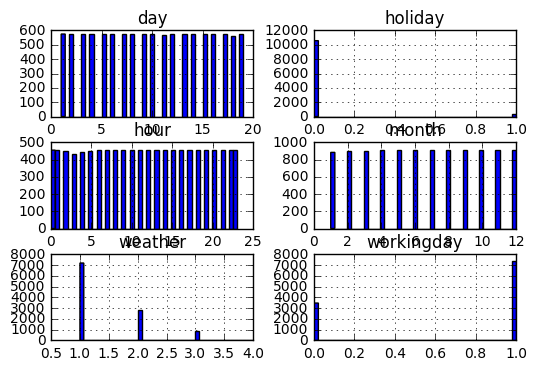

In [80]:
df1.hist(layout=(3,2), bins='rice')
plt.show()
# nb of bins has to be manually chosen, to reflect the nb of elements in the bin

In [81]:
print len(df[df['day']==1])
print len(df[df['weather']==1])

575
7192


In [82]:
# Histograms above correspond to variables of nominal type data. 
# Nominal refers to data that is categorical, for example substracting one month from another has no meaning.
# workingday predictor: if day is neither weekend nor holiday is 1, otherwise is 0.
# weather predictor: + weathersit : 
#- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# temperature predictor: Normalized temperature in Celsius. 
# The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
# hour predictor
# The most values seems to be collected in the first and last hour of the day

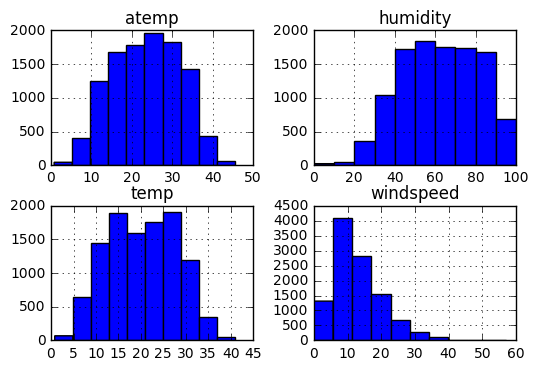

In [83]:
df2.hist(layout=(2,2))
plt.show()

In [84]:
# The histograms above are example of interval data, these type of data have scale. 
# The variables do not follow a normal distribution either.

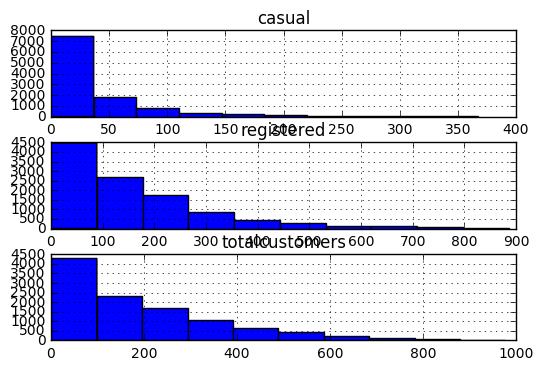

In [85]:
df3.hist(layout=(3,1))
plt.show()

In [86]:
# The diagrams are positively skewed

In [87]:
# Descriptive statistic elements
# let's evaluate the mean and the median values of the customers for each season. 
# We check for noticeable differences between the mean and the median.
# As the mean is more susceptible to outliers, it would conceivably be distorted greatly in the presence of a large number of outliers or large outliers values.
# For variables depicting the total number of clients, casual or registered show differences between the 
# mean value and the median. This shows the possible existence of outliers. 


In [88]:
df["casual"].mean()

36.02195480433584

In [89]:
df["casual"].median()

17.0

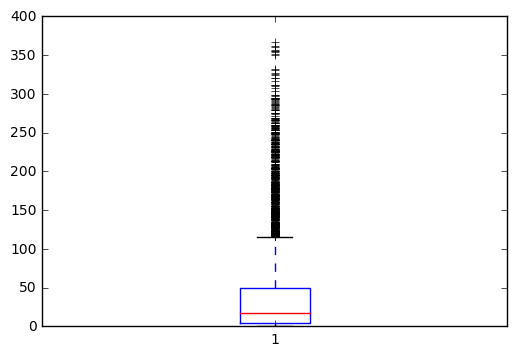

In [90]:
# casual customers boxplot
plt.boxplot(df.casual)
plt.show()
data=df.casual
median = np.median(data)
upper_quartile = np.percentile(data, 75)
lower_quartile = np.percentile(data, 25)
iqr = upper_quartile - lower_quartile
upper_whisker =data[data<=upper_quartile+1.5*iqr].max()
lower_whisker = data[data>=lower_quartile-1.5*iqr].min()

# the Boxplot does show the presence of many outliers

In [91]:
df["totalcustomers"].mean()

191.57413191254824

In [92]:
df["totalcustomers"].median()

145.0

In [93]:
#  for the variables like season, holiday, workingday, a median or mean value makes no sense.

In [94]:
# boxes: the main body of the boxplot showing the quartiles and the median’s confidence intervals if enabled.
# medians: horizonal lines at the median of each box.
# whiskers: the vertical lines extending to the most extreme, n-outlier data points.
# caps: the horizontal lines at the ends of the whiskers.
# fliers: points representing data that extend beyone the whiskers (outliers).

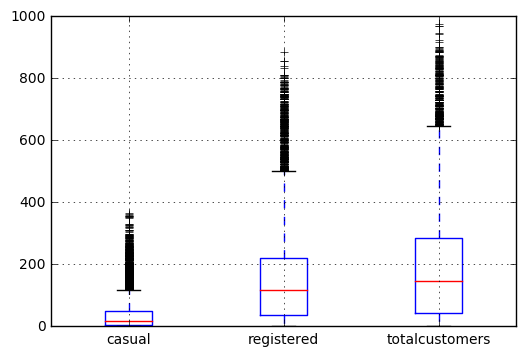

In [95]:
df3.boxplot()
plt.show()

In [96]:
# we can then extract all the information in the boxplots that you are interested in, e.g. median, upper_quartile, iqr, etc.
# I have wrote and example for the 'totalcustomers' variable
data=df.totalcustomers
median = np.median(data)
upper_quartile = np.percentile(data, 75)
lower_quartile = np.percentile(data, 25)
iqr = upper_quartile - lower_quartile
upper_whisker =data[data<=upper_quartile+1.5*iqr].max()
lower_whisker = data[data>=lower_quartile-1.5*iqr].min()
print upper_whisker
print iqr

647
242.0


In [97]:
# For the humidity variable there seems to be no significant difference between the mean and the median values.
# Same situation for the windspeed and for the temperature, which means that most probably outliers are not present 

In [98]:
df["humidity"].mean()

61.88645967297446

In [99]:
df["humidity"].median()

62.0

In [100]:
df["windspeed"].mean()

12.799395406945093

In [101]:
df["windspeed"].median()

12.998

In [102]:
df["temp"].mean()

20.230859819952173

In [103]:
df["temp"].median()

20.5

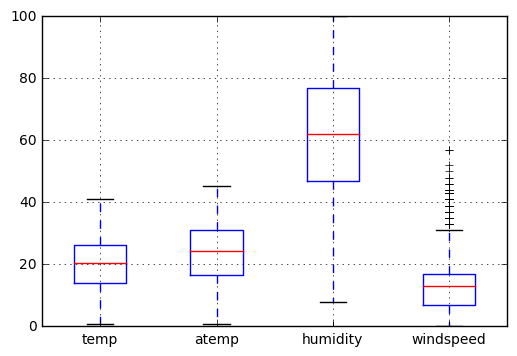

In [104]:
df2.boxplot()
plt.show()
# for the variable windspeed a small number of outliers is present, the influence on the mean value is not significantly large

In [105]:
# We will continue to investigate these attributes in the nex paragraph about normality 
# The Shapiro-Wills normality test 

In [106]:
# Let us start by checking the correlation between our variables
# Analyze the level of correlation between the DataFrame variables

In [107]:
df.corr(method='pearson', min_periods=1)
# The correlation matrix show some existing relation between the nb of casual and total customers, 
# between the registered and total nb of customers,
# however, weather characteristic does not seems to have a significant impact on the nb of customers

,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,totalcustomers
year,1.000000,-0.004932,0.001800,-0.004234,-0.004797,0.012021,-0.002482,-0.012548,0.061226,0.058540,-0.078606,-0.015221,0.145241,0.264265,0.260403
month,-0.004932,1.000000,0.001974,-0.006818,0.971524,0.001731,-0.003394,0.012144,0.257589,0.264173,0.204537,-0.150192,0.092722,0.169451,0.166862
day,0.001800,0.001974,1.000000,0.001132,0.001729,-0.015877,0.009829,-0.007890,0.015551,0.011866,-0.011335,0.036157,0.014109,0.019111,0.019826
hour,-0.004234,-0.006818,0.001132,1.000000,-0.006546,-0.000354,0.002780,-0.022740,0.145430,0.140343,-0.278011,0.146631,0.302045,0.380540,0.400601
season,-0.004797,0.971524,0.001729,-0.006546,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.012021,0.001731,-0.015877,-0.000354,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.002482,-0.003394,0.009829,0.002780,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,-0.012548,0.012144,-0.007890,-0.022740,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.061226,0.257589,0.015551,0.145430,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.058540,0.264173,0.011866,0.140343,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784


In [108]:
# The correlation coefficient between the temp and atemp variables is close to 1, i.e. 0.984948. The same situation for registered and total customer number.
# In order to avoid a multicollinearity situation, we will eliminate the atemp variable from our dataframe
# season and month very high correlation 0.97
# the correlation is moderate also between the casual and total customers 0.69 
# This corelation can also be seen in the figures below

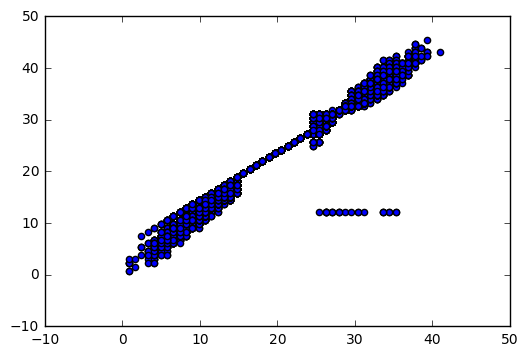

In [109]:
plt.scatter(df.temp, df.atemp)
plt.show()

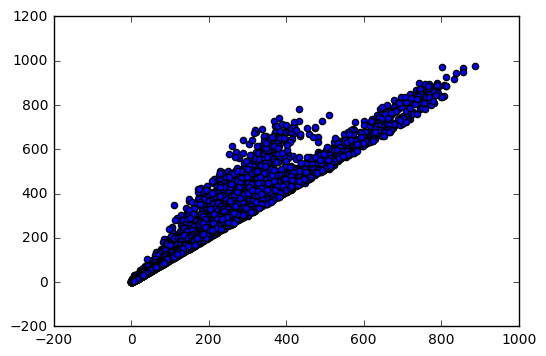

In [110]:
plt.scatter(df.registered, df.totalcustomers)
plt.show()

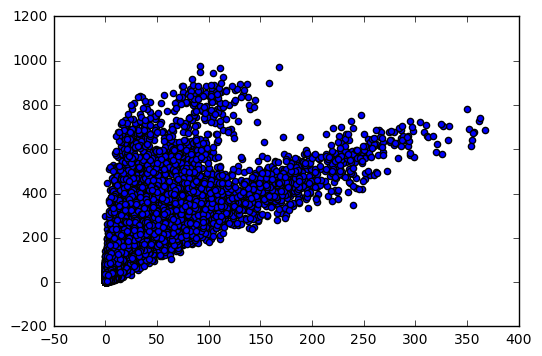

In [111]:
plt.scatter(df.casual, df.totalcustomers)
plt.show()
# moderate correlation

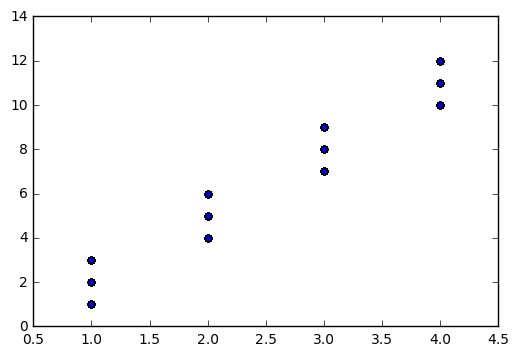

In [112]:
plt.scatter(df.season, df.month)
plt.show()


In [113]:
# Heatmap to see the correlation matrix on a different level

# import seaborn as sns
# sns.heatmap(df[['year', 'month', 'day','hour', 'holiday','workingday', 'weather','temp','humidity','windspeed','casual', 'totalcustomers']].corr(), annot=True)
# plt.show()
# There is an issue with matplotlib boxplot fliers not showing up when seaborn is imported, 
# even when fliers are explicitly enabled. In these conditions this heatmap, showing in a nice way the correlation coefficients is here commented.
# you can used, but pay attention that in the boxplot histogram, you will not be able to see the fliers.


In [114]:
from scipy import stats

In [115]:
# Perform the Shapiro-Wilk test for normality.
# Some of our variable have a distribution that is could be normal.
# The Shapiro-Wills test is in fact a test for the existence of a normal distributuion in data: it tests the null hypothesis that data are normal. 
# If the p-value is greater than the chosen alpha level, then the null hypothesis that the data came from a normally distributed population cannot be rejected (e.g., for an alpha level of 0.05, a data set with a p-value of 0.02 rejects the null hypothesis that the data are from a normally distributed population).[2] However, since the test is biased by sample size,[3] the test may be statistically significant from a normal distribution in any large samples. Thus a Q–Q plot is required for verification in addition to the test.
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution: if the p-value is less than the chosen alpha level (0.05 here),
# then the null hypothesis is rejected and there is evidence that the data tested are not from a normally distributed population.
# The test show that the data are actually not normally distributed. The p-values are extremely small.
newdf=df.drop('atemp',axis=1).drop('season',axis=1)
stats.shapiro(newdf.humidity)

(0.9822689294815063, 1.245496990918048e-34)

In [116]:
# because of this message, we also back our normality test with a qqplot

In [117]:
stats.shapiro(newdf.temp)

(0.9804092645645142, 4.47221826500091e-36)

In [118]:
stats.shapiro(newdf.windspeed)

(0.9587375521659851, 0.0)

In [119]:
stats.shapiro(newdf.totalcustomers)

(0.8783667087554932, 0.0)

In [120]:
stats.shapiro(newdf.casual)

(0.7056357264518738, 0.0)

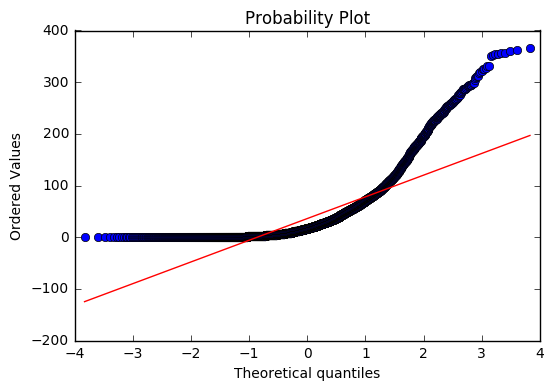

In [121]:
# the Shapiro Wills test is biased by sample size, our data based has more than 5000 entries
# the test may be statistically significant from a normal distribution in any large samples. 
# Thus a Q–Q plot is required for verification in addition to the test.
# test the normal distribution case with quantile - quantile plot with scipy
# Th thick blue line represents the distribution of the actual variable from the data set 
# and the straight red line is a mapping of what the normal distribution would look like
import pylab
stats.probplot(newdf.casual, dist="norm", plot=pylab)
pylab.show()
# clearly not normally distributed

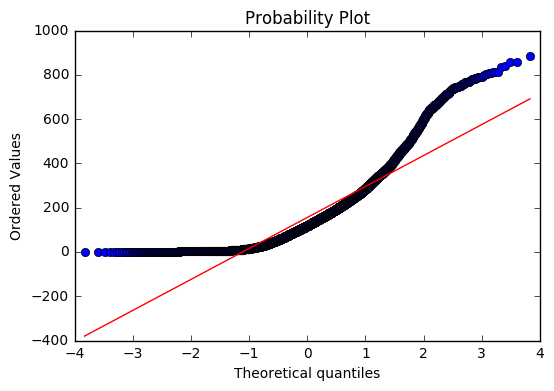

In [122]:
stats.probplot(newdf.registered, dist="norm", plot=pylab)
pylab.show()

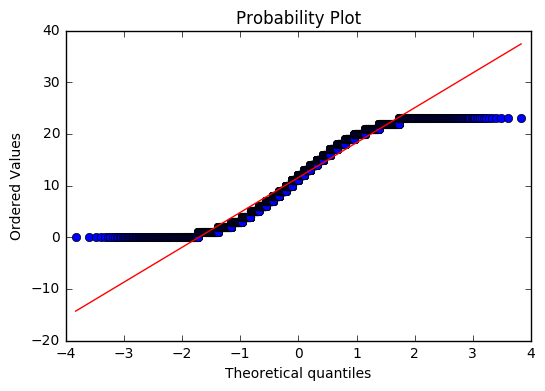

In [123]:
stats.probplot(newdf.hour, dist="norm", plot=pylab)
pylab.show()

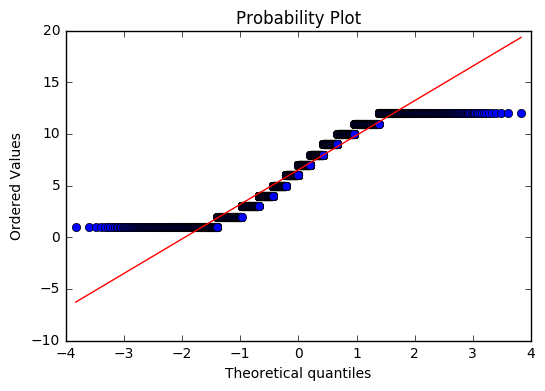

In [124]:
stats.probplot(newdf.month, dist="norm", plot=pylab)
pylab.show()

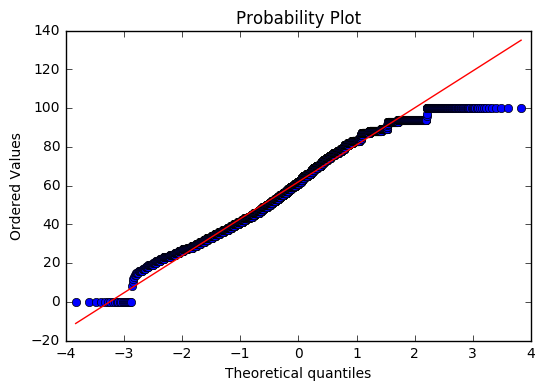

In [125]:
stats.probplot(newdf.humidity, dist="norm", plot=pylab)
pylab.show()

In [126]:
# It looks like the tested variables are not normally distributed

In [127]:
# Let's use some visualisation tools to explore our data

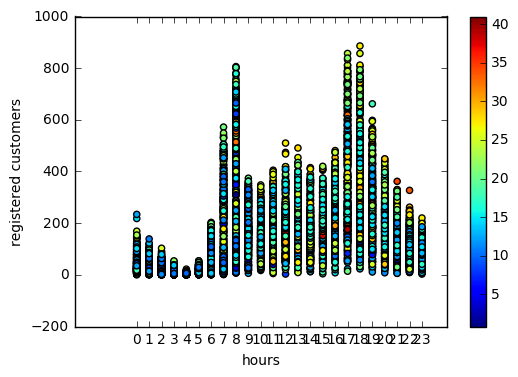

In [128]:
plt.scatter(newdf.hour, newdf.registered, c=df.temp,cmap='jet')
plt.colorbar()
ticks=np.arange(0,24,1)
labels = range(ticks.size)
plt.xticks(ticks,labels)
plt.xlabel('hours')
plt.ylabel('registered customers')
plt.show()
# It looks like the largest amount of registered customers is between 7 and 8, when people probably go to work 
# and then again between 17.00 and 18.00, when people leave work.
# This diagram clearly makes a lot of sense. 

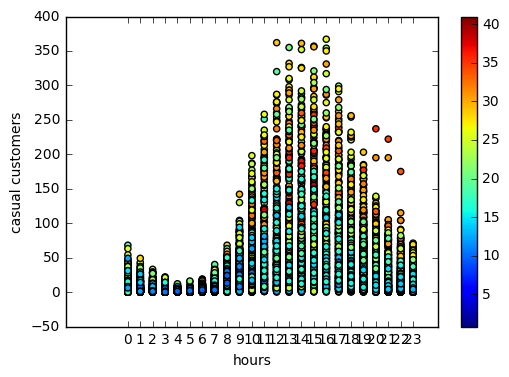

In [129]:
plt.scatter(newdf.hour, newdf.casual, c=df.temp, cmap='jet')
plt.colorbar()
ticks=np.arange(0,24,1)
labels = range(ticks.size)
plt.xticks(ticks,labels)
plt.xlabel('hours')
plt.ylabel('casual customers')
plt.show()
# It looks like the nb of casual customers (most of them probably turists) starts to increase around 9.00 a.m. and then decreases agin starting with 22.00. 
# The number of casul customers is clearly larger for optimal wheater between 20 and 30 degrees.  

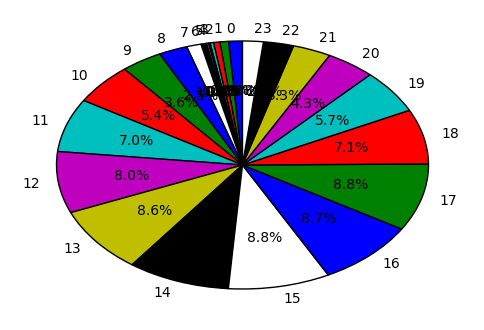

In [130]:
labels_hour=df.hour.unique()
values_hour=df.groupby('hour')['casual'].sum()

plt.pie(values_hour, labels=labels_hour,
                autopct='%1.1f%%', shadow=False, startangle=90)
plt.show()
# Same conclusion as above: the number of customers increase after 11a.m. and decrease after 6p.m. 

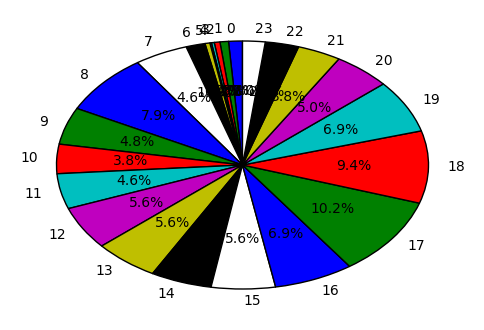

In [131]:
labels_hour=df.hour.unique()
values_hour=df.groupby('hour')['totalcustomers'].sum()

plt.pie(values_hour, labels=labels_hour,
                autopct='%1.1f%%', shadow=False, startangle=90)
plt.show()
# We regain the conclusion from figures above: totalcustomers/registered number is larger around 8 a.m and 5-6 p.m.

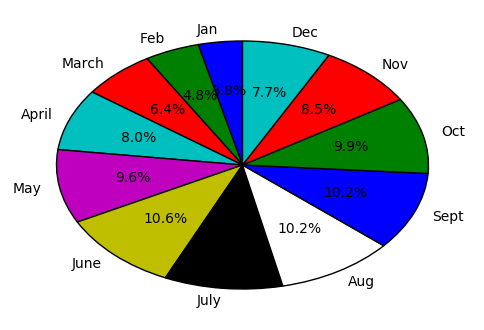

In [132]:
labels_month = ['Jan','Feb','March','April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
values_month = df.groupby('month')['totalcustomers'].sum()
plt.pie(values_month, labels=labels_month,
                autopct='%1.1f%%', shadow=False, startangle=90)
plt.show()
# The number of totalcustomers is larger between May and October

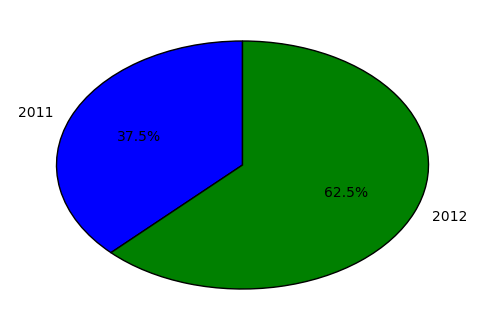

In [133]:
labels_year=df.year.unique()
values_year=df.groupby('year')['totalcustomers'].sum()

plt.pie(values_year, labels=labels_year,
                autopct='%1.1f%%', shadow=False, startangle=90)
plt.show()
# This shows that the number of bike demands is much larger for 2012 

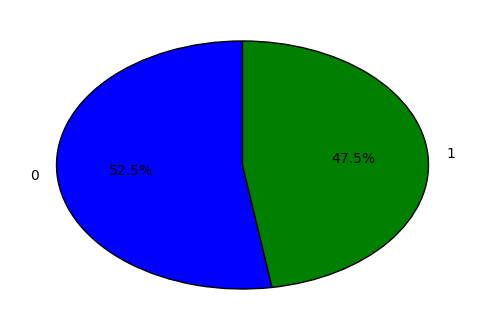

In [134]:
labels_day=df.workingday.unique()
values_day=df.groupby('workingday')['casual'].sum()
plt.pie(values_day, labels=labels_day,
                autopct='%1.1f%%', shadow=False, startangle=90)
plt.show()
# slight increase in the number of casual bikers over the weekends

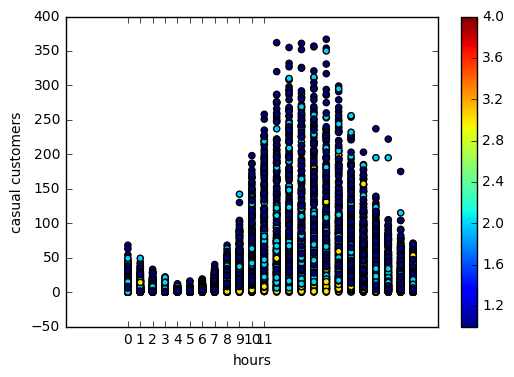

In [135]:
plt.scatter(newdf.hour, newdf.casual, c=df.weather)
plt.colorbar()
ticks=np.arange(0,12,1)
labels = range(ticks.size)
plt.xticks(ticks,labels)
plt.xlabel('hours')
plt.ylabel('casual customers')
plt.show()
# casual customers number has the same hourly distribution in terms of wheater as in terms of temperature 

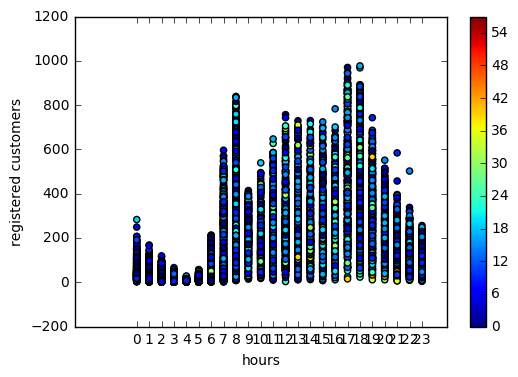

In [136]:
plt.scatter(newdf.hour, newdf.totalcustomers, c=df.windspeed, cmap='jet')
plt.colorbar()
ticks=np.arange(0,24,1)
labels = range(ticks.size)
plt.xticks(ticks,labels)
plt.xlabel('hours')
plt.ylabel('registered customers')
plt.show()
# the larger numb of customers use the bike for wind temperature up to 18km/h

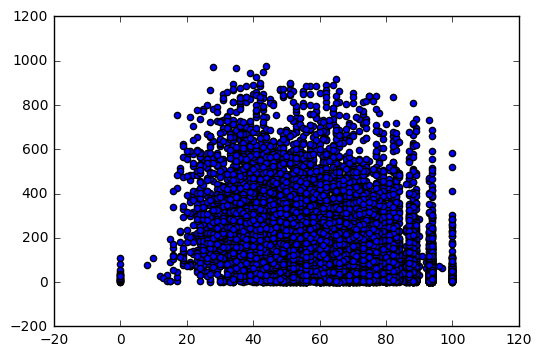

In [137]:
plt.scatter(newdf.humidity, newdf.totalcustomers)
plt.show()

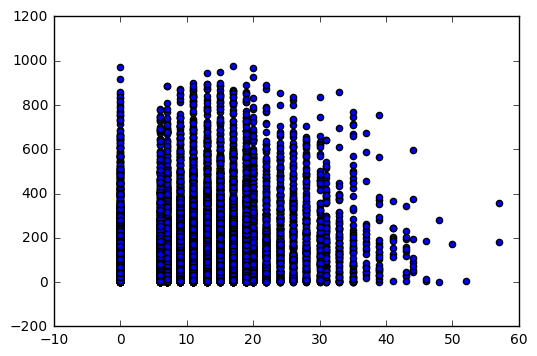

In [138]:
plt.scatter(newdf.windspeed, newdf.totalcustomers)
plt.show()
# the wind speed has a certain influence on the nb of customers

In [139]:
#Bike sharing system - Part II  - Building the model ...

In [140]:
# Building the regression model. First we split the dataFrame into a training and test case (60%, 40%).
# test_size=0.4 inside the function indicates the percentage of the data that should be held over for testing.

In [141]:
from sklearn.cross_validation import train_test_split
training, testing= train_test_split( newdf, test_size=0.4, random_state=1 )
print len(training)
print len(testing)

6531
4355


In [142]:
# ...